## Programming Exercise 2 -- Logistic Regression

In [10]:
# %load ../../standard_import.txt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from mpl_toolkits.mplot3d import axes3d

pd.set_option('display.notebook_repr_html', False)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 250)
pd.set_option('display.max_seq_items', None)
 
#%config InlineBackend.figure_formats = {'pdf',}
%matplotlib inline  

import seaborn as sns
sns.set_context('notebook')
sns.set_style('white')

### 1.1 Visualizaing the data

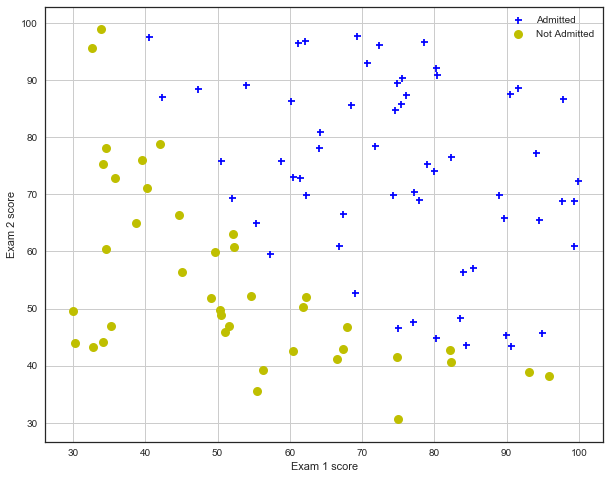

In [2]:
data1 = np.loadtxt('ex2data1.txt', delimiter=',')
X = data1[:,0:2]
y = data1[:,2]
m = X.shape[0]
# Add x0 = 1 to first column of X
X_new = np.column_stack((np.ones(X.shape[0]), X))
# Transer from 1-D ndarray to matrix !!!
y_new = np.matrix(y).T
# print(y[1:5])
X_pos =  np.array([X[i,:] for i in range(m) if y[i] == 1])
X_neg =  np.array([X[i,:] for i in range(m) if y[i] == 0])
assert m == len(X_pos)+len(X_neg)
# print(m,X_pos.shape,X_neg.shape)

### plot data
def plotData():
    plt.figure(figsize=(10,8))
    plt.scatter(X_pos[:,0], X_pos[:,1], c='b', marker='+', label='Admitted', linewidths=2)
    plt.scatter(X_neg[:,0], X_neg[:,1], c='y', marker='o', label='Not Admitted', linewidths=2)
    plt.xlabel('Exam 1 score')
    plt.ylabel('Exam 2 score')
    plt.legend()
    plt.grid(True)
    plt.show()

plotData()

### 1.2 Implementation

### 1.2.1 Warmup exercise: sigmoid function

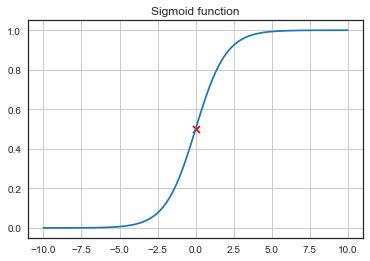

In [3]:
### scalar implementation of sigmoid function
def sigmoid(z):
    return 1/(1 + np.exp(-z))

# builtin vecterized sigmoid function expit in scipy
from scipy.special import expit
# print(expit([[1,2,3],[4,5,6]]))


z = np.linspace(-10,10,100)
plt.grid(True)
plt.plot(z, sigmoid(z), label='Sigmoid')
plt.scatter(0, sigmoid(0), c='r', marker='x')
plt.title('Sigmoid function')


### 1.2.2 Cost function and gradient
Cost function for logistic regression:
$$
\begin{equation*}
J ( \theta ) = \frac{1} {m} \sum _ {i=1} ^ m [ -y^{(i)} log(h _ \theta ( x ^ {(i)} )) - ( 1 - y ^ {(i)} )log( 1 - h _ \theta(x^{(i)}))] 
\end{equation*}
$$
Gradient is:
$$
\begin{equation*}
\frac{∂J ( \theta )} {∂\theta} = \frac{1} {2m} \sum _ {i=1} ^ m ( h _ \theta ( x ^ {(i)} ) - y ^ {(i)} )x_j^{(i)} ,\space\space   (j =0,1,...,n)
\end{equation*}
$$

In [4]:
### define costFunction
def costFunction(theta, X, y):
    m = y.size
    grad = np.zeros(theta.shape)
    h = expit(X.dot(theta))
    J = 1/m*(-y.T.dot(np.log(h)) - (1-y).T.dot(np.log(1-h)))
    grad = 1/m*(X.T.dot(h-y))
    return J


def gradient(theta, X, y):
    m = y.size
    h = expit(X.dot(theta))
    grad =(1/m)*X.T.dot(h-y)
    return grad
## check that with theta as zeros, cost is about 0.693
initTheta = np.zeros((X_new.shape[1]))
# initTheta = np.matrix(np.zeros((X_new.shape[1], 1)))
cst = costFunction(initTheta, X_new, y_new)
print(cst)

[[ 0.69314718]]


### 1.2.3 Learn parameters with fmin

In [5]:
### In octave, use fminunc, here we use scipy.optimize.fmin
from scipy.optimize import fmin, minimize
### optimizeTheta
def optimizeTheta(theta, X, y):
    res = fmin(costFunction, theta, args=(X,y), maxiter=400, full_output=True)
    return (res[0],res[1])

### get opimized theta
optTheta,minCost = optimizeTheta(initTheta, X_new, y_new)
optTheta = np.matrix(optTheta).T
print(optTheta)

Optimization terminated successfully.
         Current function value: 0.203498
         Iterations: 157
         Function evaluations: 287
[[-25.16130062]
 [  0.20623142]
 [  0.20147143]]


### 1.2.4 Evaluating logistic regression

In [6]:
### predict
def predict(theta, X, threshold=0.5):
    p = expit(X.dot(theta)) >= threshold
    return (p.astype('int'))
        
# Student with Exam 1 score 45 and Exam 2 score 85
# Predict using the optimized Theta values from above 
score = np.array([1, 45, 85])
p = expit(score.dot(optTheta))
print(p)

[[ 0.77629159]]


In [7]:
pred = predict(optTheta, X_new)
acc = np.sum(pred.ravel() == y.ravel())/ pred.size
print("The train accuracy is {}%".format(100*acc))

The train accuracy is 89.0%


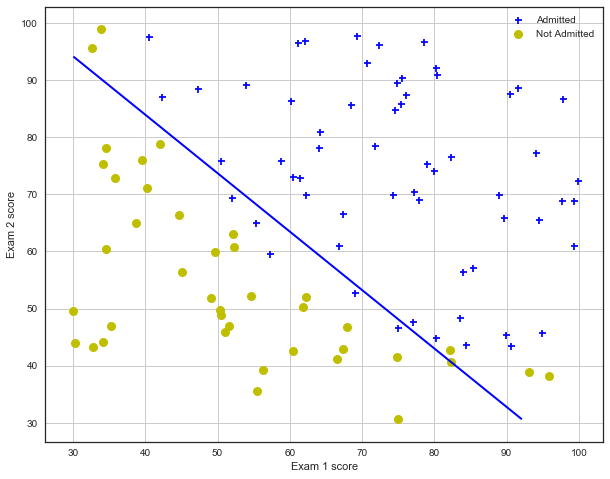

In [8]:
def plotDecisionBoundary():
    plt.figure(figsize=(10,8))
    plt.scatter(X_pos[:,0], X_pos[:,1], c='b', marker='+', label='Admitted', linewidths=2)
    plt.scatter(X_neg[:,0], X_neg[:,1], c='y', marker='o', label='Not Admitted', linewidths=2)
    plt.xlabel('Exam 1 score')
    plt.ylabel('Exam 2 score')
    plt.legend()
    plt.grid(True)
    
    ## plot fitted line
    x1_min, x1_max = X[:,0].min(), X[:,0].max()
    x2_min, x2_max = X[:,1].min(), X[:,1].max()
    xx1, xx2 = np.meshgrid(np.linspace(x1_min, x1_max), np.linspace(x2_min, x2_max))
    h = expit(np.c_[np.ones((xx1.ravel().shape[0],1)), xx1.ravel(), xx2.ravel()].dot(optTheta))
    h = h.reshape(xx1.shape)
    plt.contour(xx1, xx2, h, [0.5], linewidths=2, colors='b')
    plt.show()

plotDecisionBoundary()
    

### 2 Regularized logistic regression

### 2.1 Visualizing the data

In [44]:
### Load data
# data2 = np.loadtxt('ex2data2.txt', delimiter=',')
data2 = pd.read_csv('ex2data2.txt', delimiter=',', header=None)
data2.columns = ['x1', 'x2', 'y']
print(data2.head())
data2.columns
data2.x1[:5]
# X = data2[:,0:2]
# y = data2[:,2]
# X = np.column_stack((np.ones(X.shape[0]), X))
# # Transer to 2D ndarray!!!
# y = y[:, np.newaxis]
# # y = y.reshape(len(y), 1)
# print(y.shape)
# print(X.shape)

         x1       x2  y
0  0.051267  0.69956  1
1 -0.092742  0.68494  1
2 -0.213710  0.69225  1
3 -0.375000  0.50219  1
4 -0.513250  0.46564  1


0    0.051267
1   -0.092742
2   -0.213710
3   -0.375000
4   -0.513250
Name: x1, dtype: float64

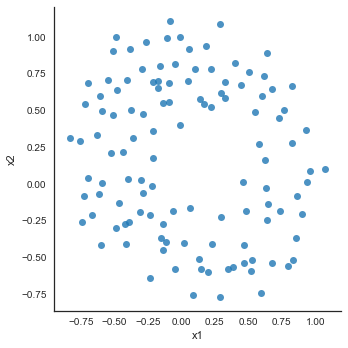

In [67]:
### Plot data
sns.lmplot(x='x1', y='x2', data=data2, fit_reg=False)